# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

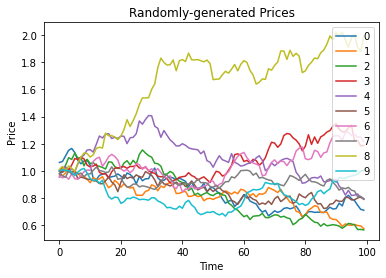

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

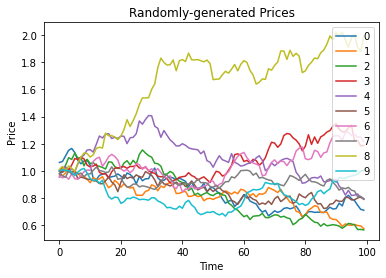

In [3]:
returns2 = pd.DataFrame(np.random.normal(1.005, 0.01, (100, 10)))
prices2 = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [4]:
s = pd.Series([1, 2, np.nan, 4, 5])
print (s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [5]:
s2 = pd.Series([np.nan, 3, 5, 7, 9])
print (s2)

0    NaN
1    3.0
2    5.0
3    7.0
4    9.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [6]:
print (s.name)

None


In [7]:
print (s2.name)

None


This name can be directly modified with no repercussions.

In [8]:
s.name = "Toy Series"
print (s.name)

Toy Series


In [9]:
s2.name = "Cheese quantity"
print (s2.name)

Cheese quantity


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [10]:
print (s.index)

RangeIndex(start=0, stop=5, step=1)


In [11]:
print (s2.index)

RangeIndex(start=0, stop=5, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [12]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [13]:
new_index2 = pd.date_range("2003-02-04", periods=len(s2), freq="D")
print (new_index2)

DatetimeIndex(['2003-02-04', '2003-02-05', '2003-02-06', '2003-02-07',
               '2003-02-08'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [14]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [15]:
s2.index = new_index2
print (s2.index)

DatetimeIndex(['2003-02-04', '2003-02-05', '2003-02-06', '2003-02-07',
               '2003-02-08'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [16]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


In [17]:
print ("First element: ", s2.iloc[0])
print ("Last last element: ", s2.iloc[len(s2)-1])

First element:  nan
Last last element:  9.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [18]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [19]:
s2.iloc[:2]

2003-02-04    NaN
2003-02-05    3.0
Freq: D, Name: Cheese quantity, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [20]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [21]:
start2 = 0
end2 = len(s2) - 1
step2 = 1

s2.iloc[start2:end2:step2]

2003-02-04    NaN
2003-02-05    3.0
2003-02-06    5.0
2003-02-07    7.0
Freq: D, Name: Cheese quantity, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [22]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

In [23]:
s2.iloc[::-1]

2003-02-08    9.0
2003-02-07    7.0
2003-02-06    5.0
2003-02-05    3.0
2003-02-04    NaN
Freq: -1D, Name: Cheese quantity, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [24]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

In [25]:
s2.iloc[-2:-4:-1]

2003-02-07    7.0
2003-02-06    5.0
Freq: -1D, Name: Cheese quantity, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [26]:
s.loc['2016-01-01']

1.0

In [27]:
s2.loc['2003-02-04']

nan

Or even for a range of dates!

In [28]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [29]:
s2.loc['1999-02-05':'1999-02-07']

Series([], Freq: D, Name: Cheese quantity, dtype: float64)

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [30]:
print (s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


In [31]:
print (s2 < 3)

2003-02-04    False
2003-02-05    False
2003-02-06    False
2003-02-07    False
2003-02-08    False
Freq: D, Name: Cheese quantity, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [32]:
print (s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [33]:
print (s2.loc[s2 < 3])

Series([], Freq: D, Name: Cheese quantity, dtype: float64)


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [34]:
print (s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [35]:
print (s2.loc[(s2 < 3) & (s2 > 1)])

Series([], Freq: D, Name: Cheese quantity, dtype: float64)


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [36]:
import pandas_datareader as pdr
import datetime 

In [37]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = pdr.get_data_yahoo(symbol, start= start, end= end)


In [38]:
symbol2 = "CMG"
start2 = "2016-01-01"
end2 = "2020-01-01"
prices2 = pdr.get_data_yahoo(symbol2, start= start2, end= end2)

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [39]:
print ("\n", type(prices))
prices.High.head(5) 


 <class 'pandas.core.frame.DataFrame'>


Date
2012-01-03    350.489990
2012-01-04    349.980011
2012-01-05    351.980011
2012-01-06    352.630005
2012-01-09    349.489990
Name: High, dtype: float64

In [40]:
print ("\n", type(prices2))
prices2.High.head(5) 


 <class 'pandas.core.frame.DataFrame'>


Date
2016-01-04    469.000000
2016-01-05    459.880005
2016-01-06    447.000000
2016-01-07    425.190002
2016-01-08    426.290009
Name: High, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [41]:
prices.name = symbol
print ('New name: ', prices.name)

New name:  CMG


In [42]:
prices2.name = symbol
print ('New name: ', prices2.name)

New name:  CMG


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [43]:
print (prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


In [44]:
print (prices2.index)

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [45]:
monthly_prices = prices.resample('M')
monthly_prices.High.head(10)

Date
2012-01-03    350.489990
2012-01-04    349.980011
2012-01-05    351.980011
2012-01-06    352.630005
2012-01-09    349.489990
                 ...    
2015-12-08    550.000000
2015-12-09    560.669983
2015-12-10    579.520020
2015-12-11    572.000000
2015-12-14    567.340027
Name: High, Length: 480, dtype: float64

In [46]:
monthly_prices2 = prices2.resample('M')
monthly_prices2.High.head(10)

Date
2016-01-04    469.000000
2016-01-05    459.880005
2016-01-06    447.000000
2016-01-07    425.190002
2016-01-08    426.290009
                 ...    
2019-12-09    828.450012
2019-12-10    827.289978
2019-12-11    823.450012
2019-12-12    825.950012
2019-12-13    818.950012
Name: High, Length: 480, dtype: float64

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [47]:
monthly_prices_med = prices.resample('M').agg('median')
monthly_prices_med.High.head(10)

Date
2012-01-31    357.750000
2012-02-29    381.485001
2012-03-31    409.630005
2012-04-30    425.824997
2012-05-31    408.979996
2012-06-30    410.989990
2012-07-31    384.500000
2012-08-31    298.670013
2012-09-30    337.829987
2012-10-31    291.809998
Freq: M, Name: High, dtype: float64

In [48]:
monthly_prices_med2 = prices2.resample('M').agg('median')
monthly_prices_med2.High.head(10)

Date
2016-01-31    455.980011
2016-02-29    490.490005
2016-03-31    508.750000
2016-04-30    458.750000
2016-05-31    453.529999
2016-06-30    410.104996
2016-07-31    419.904999
2016-08-31    404.760010
2016-09-30    421.329987
2016-10-31    416.000000
Freq: M, Name: High, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [49]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').agg(custom_resampler)
first_of_month_prices.High.head(10)

Date
2012-01-31    350.489990
2012-02-29    371.619995
2012-03-31    394.750000
2012-04-30    421.410004
2012-05-31    424.149994
2012-06-30    408.940002
2012-07-31    386.029999
2012-08-31    293.880005
2012-09-30    289.739990
2012-10-31    322.920013
Freq: M, Name: High, dtype: float64

In [50]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices2 = prices2.resample('M').agg(custom_resampler)
first_of_month_prices2.High.head(10)

Date
2016-01-31    469.000000
2016-02-29    479.000000
2016-03-31    516.000000
2016-04-30    467.899994
2016-05-31    434.149994
2016-06-30    443.559998
2016-07-31    405.290009
2016-08-31    426.000000
2016-09-30    415.890015
2016-10-31    433.950012
Freq: M, Name: High, dtype: float64

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [51]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print (calendar_dates)
calendar_dates = calendar_dates.tz_localize(None)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [52]:
calendar_dates2 = pd.date_range(start=start2, end=end2, freq='D', tz='UTC')
print (calendar_dates2)
calendar_dates2 = calendar_dates2.tz_localize(None)

DatetimeIndex(['2016-01-01 00:00:00+00:00', '2016-01-02 00:00:00+00:00',
               '2016-01-03 00:00:00+00:00', '2016-01-04 00:00:00+00:00',
               '2016-01-05 00:00:00+00:00', '2016-01-06 00:00:00+00:00',
               '2016-01-07 00:00:00+00:00', '2016-01-08 00:00:00+00:00',
               '2016-01-09 00:00:00+00:00', '2016-01-10 00:00:00+00:00',
               ...
               '2019-12-23 00:00:00+00:00', '2019-12-24 00:00:00+00:00',
               '2019-12-25 00:00:00+00:00', '2019-12-26 00:00:00+00:00',
               '2019-12-27 00:00:00+00:00', '2019-12-28 00:00:00+00:00',
               '2019-12-29 00:00:00+00:00', '2019-12-30 00:00:00+00:00',
               '2019-12-31 00:00:00+00:00', '2020-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [53]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

,High,Low,Open,Close,Volume,Adj Close
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-04,349.980011,345.010010,346.000000,348.750000,743100.0,348.750000
2012-01-05,351.980011,342.570007,346.880005,350.480011,672300.0,350.480011
2012-01-06,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-07,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-08,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-09,349.489990,336.290009,349.000000,339.739990,748600.0,339.739990
2012-01-10,344.339996,336.549988,343.820007,341.119995,503500.0,341.119995


In [54]:
calendar_prices2 = prices2.reindex(calendar_dates2, method='ffill')
calendar_prices2.head(15)

,High,Low,Open,Close,Volume,Adj Close
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,469.000000,447.500000,468.700012,448.809998,2690300.0,448.809998
2016-01-05,459.880005,446.799988,450.000000,449.029999,2161300.0,449.029999
2016-01-06,447.000000,423.000000,437.940002,426.670013,3646900.0,426.670013
2016-01-07,425.190002,411.609985,415.079987,416.000000,1892000.0,416.000000
2016-01-08,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009
2016-01-09,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009
2016-01-10,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009


You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [55]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
2012-01-01,505.968781,496.024062,501.053466,501.068185,616588.356164,501.068185
2012-01-02,505.968781,496.024062,501.053466,501.068185,616588.356164,501.068185
2012-01-03,350.489990,340.000000,343.700012,341.269989,728100.000000,341.269989
2012-01-04,349.980011,345.010010,346.000000,348.750000,743100.000000,348.750000
2012-01-05,351.980011,342.570007,346.880005,350.480011,672300.000000,350.480011
2012-01-06,352.630005,347.350006,348.880005,348.950012,370700.000000,348.950012
2012-01-07,352.630005,347.350006,348.880005,348.950012,370700.000000,348.950012
2012-01-08,352.630005,347.350006,348.880005,348.950012,370700.000000,348.950012
2012-01-09,349.489990,336.290009,349.000000,339.739990,748600.000000,339.739990
2012-01-10,344.339996,336.549988,343.820007,341.119995,503500.000000,341.119995


In [56]:
meanfilled_prices2 = calendar_prices2.fillna(calendar_prices2.mean())
meanfilled_prices2.head(10)

,High,Low,Open,Close,Volume,Adj Close
2016-01-01,491.433125,480.058623,485.605565,485.674359,9.578774e+05,485.674359
2016-01-02,491.433125,480.058623,485.605565,485.674359,9.578774e+05,485.674359
2016-01-03,491.433125,480.058623,485.605565,485.674359,9.578774e+05,485.674359
2016-01-04,469.000000,447.500000,468.700012,448.809998,2.690300e+06,448.809998
2016-01-05,459.880005,446.799988,450.000000,449.029999,2.161300e+06,449.029999
2016-01-06,447.000000,423.000000,437.940002,426.670013,3.646900e+06,426.670013
2016-01-07,425.190002,411.609985,415.079987,416.000000,1.892000e+06,416.000000
2016-01-08,426.290009,411.739990,419.839996,413.290009,1.297200e+06,413.290009
2016-01-09,426.290009,411.739990,419.839996,413.290009,1.297200e+06,413.290009
2016-01-10,426.290009,411.739990,419.839996,413.290009,1.297200e+06,413.290009


Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [57]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
2012-01-01,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-02,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-03,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-04,349.980011,345.010010,346.000000,348.750000,743100.0,348.750000
2012-01-05,351.980011,342.570007,346.880005,350.480011,672300.0,350.480011
2012-01-06,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-07,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-08,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-09,349.489990,336.290009,349.000000,339.739990,748600.0,339.739990
2012-01-10,344.339996,336.549988,343.820007,341.119995,503500.0,341.119995


In [58]:
bfilled_prices2 = calendar_prices2.fillna(method='bfill')
bfilled_prices2.head(10)

,High,Low,Open,Close,Volume,Adj Close
2016-01-01,469.000000,447.500000,468.700012,448.809998,2690300.0,448.809998
2016-01-02,469.000000,447.500000,468.700012,448.809998,2690300.0,448.809998
2016-01-03,469.000000,447.500000,468.700012,448.809998,2690300.0,448.809998
2016-01-04,469.000000,447.500000,468.700012,448.809998,2690300.0,448.809998
2016-01-05,459.880005,446.799988,450.000000,449.029999,2161300.0,449.029999
2016-01-06,447.000000,423.000000,437.940002,426.670013,3646900.0,426.670013
2016-01-07,425.190002,411.609985,415.079987,416.000000,1892000.0,416.000000
2016-01-08,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009
2016-01-09,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009
2016-01-10,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009


But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [59]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
2012-01-03,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-04,349.980011,345.010010,346.000000,348.750000,743100.0,348.750000
2012-01-05,351.980011,342.570007,346.880005,350.480011,672300.0,350.480011
2012-01-06,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-07,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-08,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-09,349.489990,336.290009,349.000000,339.739990,748600.0,339.739990
2012-01-10,344.339996,336.549988,343.820007,341.119995,503500.0,341.119995
2012-01-11,347.920013,338.239990,340.000000,347.600006,573900.0,347.600006
2012-01-12,348.510010,343.799988,347.609985,347.619995,384900.0,347.619995


In [60]:
dropped_prices2 = calendar_prices2.dropna()
dropped_prices2.head(10)

,High,Low,Open,Close,Volume,Adj Close
2016-01-04,469.000000,447.500000,468.700012,448.809998,2690300.0,448.809998
2016-01-05,459.880005,446.799988,450.000000,449.029999,2161300.0,449.029999
2016-01-06,447.000000,423.000000,437.940002,426.670013,3646900.0,426.670013
2016-01-07,425.190002,411.609985,415.079987,416.000000,1892000.0,416.000000
2016-01-08,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009
2016-01-09,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009
2016-01-10,426.290009,411.739990,419.839996,413.290009,1297200.0,413.290009
2016-01-11,419.920013,406.350006,416.649994,411.100006,1462500.0,411.100006
2016-01-12,420.799988,399.140015,415.500000,404.260010,1658400.0,404.260010
2016-01-13,432.299988,406.649994,407.799988,428.279999,3552500.0,428.279999


Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

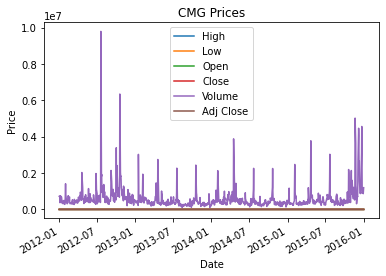

In [61]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

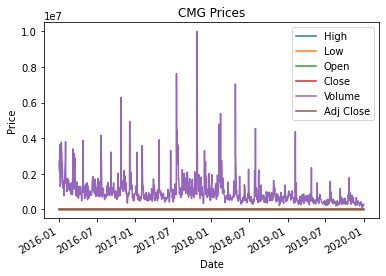

In [62]:
prices2.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [63]:
print ("Mean: ", prices.mean())
print ("Standard deviation: ", prices.std())

Mean:  High            506.547406
Low             496.621740
Open            501.580328
Close           501.636650
Volume       591171.868787
Adj Close       501.636650
dtype: float64
Standard deviation:  High            147.589064
Low             145.792764
Open            146.831560
Close           146.688738
Volume       615931.535248
Adj Close       146.688738
dtype: float64


In [64]:
print ("Mean: ", prices2.mean())
print ("Standard deviation: ", prices2.std())

Mean:  High            491.678320
Low             480.073480
Open            485.735955
Close           485.887306
Volume       970359.741551
Adj Close       485.887306
dtype: float64
Standard deviation:  High            156.720792
Low             154.765406
Open            156.012950
Close           156.002033
Volume       788499.135930
Adj Close       156.002033
dtype: float64


In [65]:
print ("Summary Statistics")
print (prices.describe())

Summary Statistics
              High          Low  ...        Volume    Adj Close
count  1006.000000  1006.000000  ...  1.006000e+03  1006.000000
mean    506.547406   496.621740  ...  5.911719e+05   501.636650
std     147.589064   145.792764  ...  6.159315e+05   146.688738
min     243.000000   233.820007  ...  1.012000e+05   236.240005
25%     374.037498   368.189995  ...  3.189750e+05   371.555000
50%     524.994995   515.934998  ...  4.262500e+05   521.270020
75%     651.910019   638.540024  ...  6.282000e+05   646.834991
max     758.609985   748.390015  ...  9.795100e+06   757.770020

[8 rows x 6 columns]


In [66]:
print ("Summary Statistics")
print (prices2.describe())

Summary Statistics
              High          Low  ...        Volume    Adj Close
count  1006.000000  1006.000000  ...  1.006000e+03  1006.000000
mean    491.678320   480.073480  ...  9.703597e+05   485.887306
std     156.720792   154.765406  ...  7.884991e+05   156.002033
min     257.959991   247.520004  ...  9.190000e+04   251.330002
25%     400.607506   391.994995  ...  5.481000e+05   396.050003
50%     450.115005   438.079987  ...  7.868000e+05   444.384995
75%     522.849991   510.657501  ...  1.121325e+06   517.227478
max     857.900024   842.109985  ...  9.991100e+06   851.539978

[8 rows x 6 columns]


We can easily modify `Series` with scalars using our basic mathematical operators.

In [67]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,690.979980,670.000000,677.400024,672.539978,1456190,672.539978
2012-01-04,689.960022,680.020020,682.000000,687.500000,1486190,687.500000
2012-01-05,693.960022,675.140015,683.760010,690.960022,1344590,690.960022
2012-01-06,695.260010,684.700012,687.760010,687.900024,741390,687.900024
2012-01-09,688.979980,662.580017,688.000000,669.479980,1497190,669.479980


In [68]:
modified_prices2 = prices2 * 2 - 10
modified_prices2.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,928.000000,885.000000,927.400024,887.619995,5380590,887.619995
2016-01-05,909.760010,883.599976,890.000000,888.059998,4322590,888.059998
2016-01-06,884.000000,836.000000,865.880005,843.340027,7293790,843.340027
2016-01-07,840.380005,813.219971,820.159973,822.000000,3783990,822.000000
2016-01-08,842.580017,813.479980,829.679993,816.580017,2594390,816.580017


And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [69]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,2012-01-11 00:00:00,2012-01-12 00:00:00,2012-01-13 00:00:00,2012-01-17 00:00:00,2012-01-18 00:00:00,2012-01-19 00:00:00,2012-01-20 00:00:00,2012-01-23 00:00:00,2012-01-24 00:00:00,2012-01-25 00:00:00,2012-01-26 00:00:00,2012-01-27 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00,2012-02-01 00:00:00,2012-02-02 00:00:00,2012-02-03 00:00:00,2012-02-06 00:00:00,2012-02-07 00:00:00,2012-02-08 00:00:00,2012-02-09 00:00:00,2012-02-10 00:00:00,2012-02-13 00:00:00,2012-02-14 00:00:00,2012-02-15 00:00:00,2012-02-16 00:00:00,2012-02-17 00:00:00,2012-02-21 00:00:00,2012-02-22 00:00:00,2012-02-23 00:00:00,2012-02-24 00:00:00,2012-02-27 00:00:00,2012-02-28 00:00:00,2012-02-29 00:00:00,...,2015-11-12 00:00:00,2015-11-13 00:00:00,2015-11-16 00:00:00,2015-11-17 00:00:00,2015-11-18 00:00:00,2015-11-19 00:00:00,2015-11-20 00:00:00,2015-11-23 00:00:00,2015-11-24 00:00:00,2015-11-25 00:00:00,2015-11-27 00:00:00,2015-11-30 00:00:00,2015-12-01 00:00:00,2015-12-02 00:00:00,2015-12-03 00:00:00,2015-12-04 00:00:00,2015-12-07 00:00:00,2015-12-08 00:00:00,2015-12-09 00:00:00,2015-12-10 00:00:00,2015-12-11 00:00:00,2015-12-14 00:00:00,2015-12-15 00:00:00,2015-12-16 00:00:00,2015-12-17 00:00:00,2015-12-18 00:00:00,2015-12-21 00:00:00,2015-12-22 00:00:00,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
noisy_prices2 = prices2 + 5 * pd.Series(np.random.normal(0, 5, len(prices2)), index=prices2.index) + 20
noisy_prices2.head(5)

,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,2016-02-18 00:00:00,2016-02-19 00:00:00,2016-02-22 00:00:00,2016-02-23 00:00:00,2016-02-24 00:00:00,2016-02-25 00:00:00,2016-02-26 00:00:00,2016-02-29 00:00:00,2016-03-01 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-29 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If there are no matching indices, however, we may get an empty `Series` in return.

In [71]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
empty_series2 = prices2 + pd.Series(np.random.normal(0, 1, len(prices2)))
empty_series2.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [73]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [74]:
add_returns2 = prices2.diff()[1:]
mult_returns2 = prices2.pct_change()[1:]

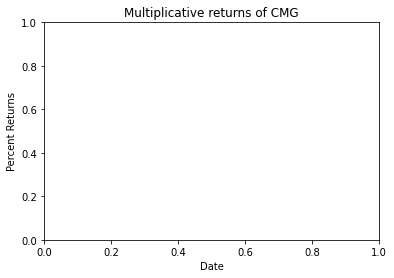

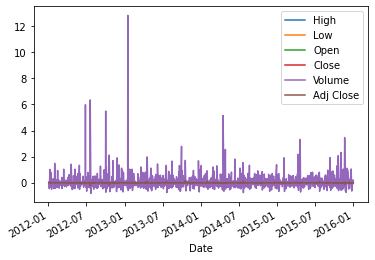

In [75]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

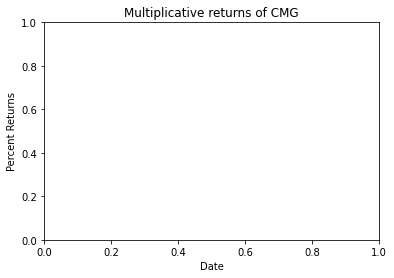

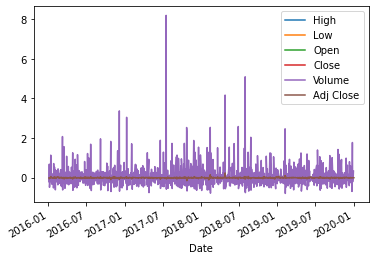

In [76]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns2.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [77]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

In [78]:
rolling_mean2 = prices2.rolling(30).mean()
rolling_mean2.name = "30-day rolling mean"

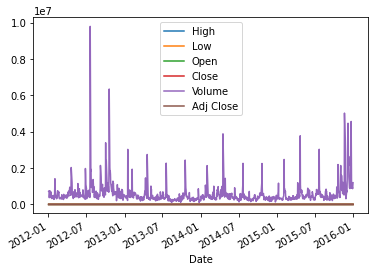

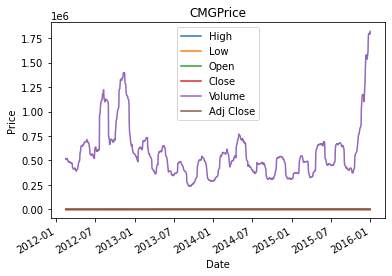

In [79]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

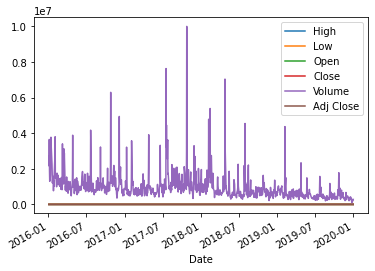

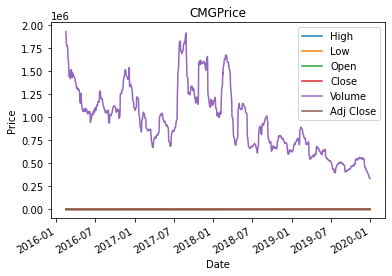

In [80]:
prices2.plot()
rolling_mean2.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [81]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

In [82]:
rolling_std2 = prices2.rolling(30).std()
rolling_std2.name = "30-day rolling volatility"

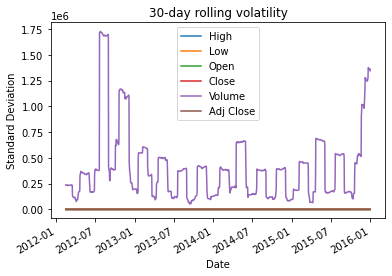

In [83]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

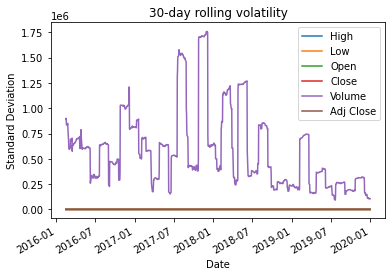

In [84]:
rolling_std2.plot()
plt.title(rolling_std2.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [85]:
print (np.median(mult_returns))

0.0005465394818680025


In [86]:
print (np.median(mult_returns2))

0.000887991111854558


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [87]:
print (mult_returns.median())

High         0.000051
Low          0.001460
Open         0.000879
Close        0.000236
Volume      -0.016473
Adj Close    0.000236
dtype: float64


In [88]:
print (mult_returns2.median())

High         0.000086
Low          0.001295
Open         0.000618
Close        0.001115
Volume       0.000349
Adj Close    0.001115
dtype: float64


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [89]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([ 0.70019123,  1.67590931, -1.68810024, -1.1522734 ,  0.87240932])}


In [90]:
dict_data2 = {
    'a' : [1, 3, 5, 7, 9],
    'b' : ['Juan', 'David', 'Carlos', 'Mulán', 'Zoe'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data2)

{'a': [1, 3, 5, 7, 9], 'b': ['Juan', 'David', 'Carlos', 'Mulán', 'Zoe'], 'c': array([ 0.77847728,  0.06606394, -0.91879493,  1.07873912,  1.16123084])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [91]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (frame_data)

            a  b         c
2016-01-01  1  L  0.700191
2016-01-02  2  K  1.675909
2016-01-03  3  J -1.688100
2016-01-04  4  M -1.152273
2016-01-05  5  Z  0.872409


In [92]:
frame_data2 = pd.DataFrame(dict_data2, index=pd.date_range('2008-01-01', periods=5))
print (frame_data2)

            a       b         c
2008-01-01  1    Juan  0.778477
2008-01-02  3   David  0.066064
2008-01-03  5  Carlos -0.918795
2008-01-04  7   Mulán  1.078739
2008-01-05  9     Zoe  1.161231


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [93]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In [94]:
s_12 = pd.Series([1, 3, 9, 27, 81], name='Power of three')
s_22 = pd.Series([1, 4, 8, 16, 32], name="Power of two")
numbers2 = pd.concat([s_12, s_22], axis=1)
print (numbers2)

   Power of three  Power of two
0               1             1
1               3             4
2               9             8
3              27            16
4              81            32


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [95]:
print (numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


In [96]:
print (numbers2.columns)

Index(['Power of three', 'Power of two'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [97]:
numbers.columns = ['Shmevens', 'Shmodds']
print (numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In [98]:
numbers2.columns = ['Powthree', 'Powtwo']
print (numbers2)

   Powthree  Powtwo
0         1       1
1         3       4
2         9       8
3        27      16
4        81      32


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [99]:
print (numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [100]:
print (numbers2.index)

RangeIndex(start=0, stop=5, step=1)


In [101]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [102]:
numbers2.index = pd.date_range("2008-01-01", periods=len(numbers2))
print (numbers2)

            Powthree  Powtwo
2008-01-01         1       1
2008-01-02         3       4
2008-01-03         9       8
2008-01-04        27      16
2008-01-05        81      32


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [103]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

In [104]:
numbers2.values

array([[ 1,  1],
       [ 3,  4],
       [ 9,  8],
       [27, 16],
       [81, 32]])

This returns a NumPy array.

In [105]:
type(numbers.values)

numpy.ndarray

In [106]:
type(numbers2.values)

numpy.ndarray

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [107]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,350.489990,340.000000,343.700012,341.269989,728100,341.269989
2012-01-04,349.980011,345.010010,346.000000,348.750000,743100,348.750000
2012-01-05,351.980011,342.570007,346.880005,350.480011,672300,350.480011
2012-01-06,352.630005,347.350006,348.880005,348.950012,370700,348.950012
2012-01-09,349.489990,336.290009,349.000000,339.739990,748600,339.739990


In [108]:
filled0_prices2 = prices2.fillna(0)
filled0_prices2.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,469.000000,447.500000,468.700012,448.809998,2690300,448.809998
2016-01-05,459.880005,446.799988,450.000000,449.029999,2161300,449.029999
2016-01-06,447.000000,423.000000,437.940002,426.670013,3646900,426.670013
2016-01-07,425.190002,411.609985,415.079987,416.000000,1892000,416.000000
2016-01-08,426.290009,411.739990,419.839996,413.290009,1297200,413.290009


In [109]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,350.489990,340.000000,343.700012,341.269989,728100,341.269989
2012-01-04,349.980011,345.010010,346.000000,348.750000,743100,348.750000
2012-01-05,351.980011,342.570007,346.880005,350.480011,672300,350.480011
2012-01-06,352.630005,347.350006,348.880005,348.950012,370700,348.950012
2012-01-09,349.489990,336.290009,349.000000,339.739990,748600,339.739990


In [110]:
bfilled_prices2 = prices2.fillna(method='bfill')
bfilled_prices2.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,469.000000,447.500000,468.700012,448.809998,2690300,448.809998
2016-01-05,459.880005,446.799988,450.000000,449.029999,2161300,449.029999
2016-01-06,447.000000,423.000000,437.940002,426.670013,3646900,426.670013
2016-01-07,425.190002,411.609985,415.079987,416.000000,1892000,416.000000
2016-01-08,426.290009,411.739990,419.839996,413.290009,1297200,413.290009


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [111]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,350.489990,340.000000,343.700012,341.269989,728100,341.269989
2012-01-04,349.980011,345.010010,346.000000,348.750000,743100,348.750000
2012-01-05,351.980011,342.570007,346.880005,350.480011,672300,350.480011
2012-01-06,352.630005,347.350006,348.880005,348.950012,370700,348.950012
2012-01-09,349.489990,336.290009,349.000000,339.739990,748600,339.739990


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

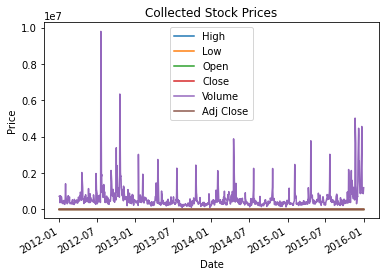

In [112]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

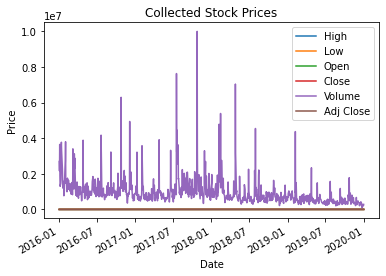

In [113]:
prices2.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [114]:
prices.mean(axis=0)

High            506.547406
Low             496.621740
Open            501.580328
Close           501.636650
Volume       591171.868787
Adj Close       501.636650
dtype: float64

In [115]:
prices2.mean(axis=0)

High            491.678320
Low             480.073480
Open            485.735955
Close           485.887306
Volume       970359.741551
Adj Close       485.887306
dtype: float64

As well as the standard deviation:

In [116]:
prices.std(axis=0)

High            147.589064
Low             145.792764
Open            146.831560
Close           146.688738
Volume       615931.535248
Adj Close       146.688738
dtype: float64

In [117]:
prices2.std(axis=0)

High            156.720792
Low             154.765406
Open            156.012950
Close           156.002033
Volume       788499.135930
Adj Close       156.002033
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [118]:
prices.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.000000
mean,506.547406,496.621740,501.580328,501.636650,5.911719e+05,501.636650
std,147.589064,145.792764,146.831560,146.688738,6.159315e+05,146.688738
min,243.000000,233.820007,234.449997,236.240005,1.012000e+05,236.240005
25%,374.037498,368.189995,370.607498,371.555000,3.189750e+05,371.555000
50%,524.994995,515.934998,521.285004,521.270020,4.262500e+05,521.270020
75%,651.910019,638.540024,645.989990,646.834991,6.282000e+05,646.834991
max,758.609985,748.390015,758.489990,757.770020,9.795100e+06,757.770020


In [119]:
prices2.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.000000
mean,491.678320,480.073480,485.735955,485.887306,9.703597e+05,485.887306
std,156.720792,154.765406,156.012950,156.002033,7.884991e+05,156.002033
min,257.959991,247.520004,254.130005,251.330002,9.190000e+04,251.330002
25%,400.607506,391.994995,396.049995,396.050003,5.481000e+05,396.050003
50%,450.115005,438.079987,444.260010,444.384995,7.868000e+05,444.384995
75%,522.849991,510.657501,514.347504,517.227478,1.121325e+06,517.227478
max,857.900024,842.109985,856.750000,851.539978,9.991100e+06,851.539978


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [120]:
(2 * prices - 50).head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,650.979980,630.000000,637.400024,632.539978,1456150,632.539978
2012-01-04,649.960022,640.020020,642.000000,647.500000,1486150,647.500000
2012-01-05,653.960022,635.140015,643.760010,650.960022,1344550,650.960022
2012-01-06,655.260010,644.700012,647.760010,647.900024,741350,647.900024
2012-01-09,648.979980,622.580017,648.000000,629.479980,1497150,629.479980


In [121]:
(2 * prices2 - 50).head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,888.000000,845.000000,887.400024,847.619995,5380550,847.619995
2016-01-05,869.760010,843.599976,850.000000,848.059998,4322550,848.059998
2016-01-06,844.000000,796.000000,825.880005,803.340027,7293750,803.340027
2016-01-07,800.380005,773.219971,780.159973,782.000000,3783950,782.000000
2016-01-08,802.580017,773.479980,789.679993,776.580017,2594350,776.580017


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [122]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-04,-0.001455,0.014735,0.006692,0.021918,0.020602,0.021918
2012-01-05,0.005715,-0.007072,0.002543,0.004961,-0.095277,0.004961
2012-01-06,0.001847,0.013953,0.005766,-0.004365,-0.448609,-0.004365
2012-01-09,-0.008905,-0.031841,0.000344,-0.026394,1.019423,-0.026394
2012-01-10,-0.014736,0.000773,-0.014842,0.004062,-0.327411,0.004062


In [123]:
mult_returns2 = prices2.pct_change()[1:]
mult_returns2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-05,-0.019446,-0.001564,-0.039898,0.000490,-0.196632,0.000490
2016-01-06,-0.028007,-0.053268,-0.026800,-0.049796,0.687364,-0.049796
2016-01-07,-0.048792,-0.026927,-0.052199,-0.025008,-0.481203,-0.025008
2016-01-08,0.002587,0.000316,0.011468,-0.006514,-0.314376,-0.006514
2016-01-11,-0.014943,-0.013091,-0.007598,-0.005299,0.127428,-0.005299


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

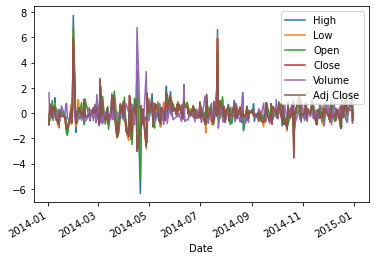

In [124]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

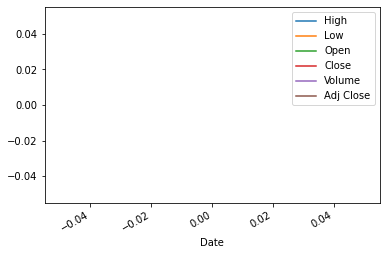

In [125]:
norm_returns2 = (mult_returns2 - mult_returns2.mean(axis=0))/mult_returns2.std(axis=0)
norm_returns2.loc['2009-01-01':'2010-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [126]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.High = prices.High

In [127]:
rolling_mean2 = prices2.rolling(30).mean()
rolling_mean2.High = prices2.High

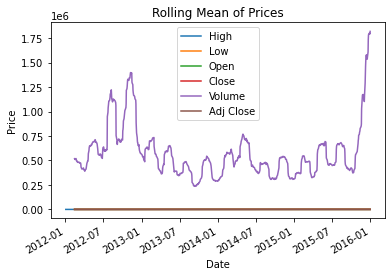

In [128]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

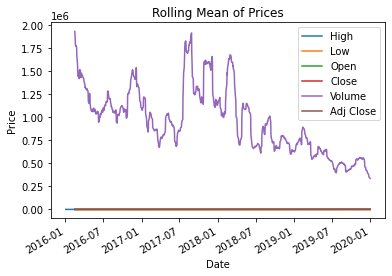

In [129]:
rolling_mean2.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*